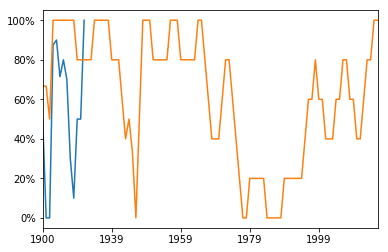

In [69]:
import csv
import sys
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

for k in ["1890", "1900", "1910", "1920", "1930", "1940", "1950", "1960", "1970", "1980", "1990", "2000", "2010"]:
    byDecade[k] = {}
    byDecade[k]['games'] = 0
    byDecade[k]['wins'] = 0

f = open('UtahBYURaw.csv', 'rt')
data = {}
rawData = csv.DictReader(f)
for row in rawData:
    year = row['YEAR']
    data[year] = {}
    data[year]['WINNER'] = row['WINNER']
    data[year]['UTAH'] = row['UTAH']
    data[year]['BYU'] = row['BYU']
    key = year[:-1]+'0'
    byDecade[key]['games'] = byDecade[key]['games'] + 1
    if row['WINNER'] == 'UTAH':
        byDecade[key]['wins'] = byDecade[key]['wins'] + 1
f.close

for k in byDecade:
    if byDecade[k]['games'] > 0:
        byDecade[k]['percentage'] = float(byDecade[k]['wins'])/float(byDecade[k]['games'])
    else:
        byDecade[k]['percentage'] = 0

rolling5Data = {}
for year in range(1900,2017):
    games = 0
    wins = 0
    for rangeYear in range(year-5,year):
        key = str(rangeYear)
        if key in data:
            games = games+1
            if data[key]['WINNER'] == 'UTAH':
                wins=wins+1
    if games > 0:
        rolling5Data[str(year)] = float(wins)/float(games)
    
percentages = {}
wins = {}
for k in byDecade:
    percentages[k] = byDecade[k]['percentage']
    wins[k] = byDecade[k]['wins']

percValues = pd.Series(percentages)
winValues = pd.Series(wins)
ax = percValues.plot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

rolling5 = pd.Series(rolling5Data)
rolling5.plot()

plt.show()
